<h1><center>**Analyse numérique du double pendule**</center></h1>

**Rédacteurs :** JUNNE Jonathan (000441146) et MOL Louan (000440167)

# 1. Introduction

Dans ce travail nous commencerons par analyser le [double pendule](https://en.wikipedia.org/wiki/Double_pendulum) du point de vue mathématique pour obtenir les équations du mouvements. Ensuite nous utiliserons la [méthode de Runge-Kutta](https://fr.wikipedia.org/wiki/M%C3%A9thodes_de_Runge-Kutta) (RK4) pour résoudre numériquement ces équations. Après avoir discuté la **convergence** d'une telle méthode, on verra comment créer une **animation** de pendule à partir des résultats obtenus.

# 2. Analyse physique du double pendule

## 2.1 Calcul du Lagrangien

Un double pendule se compose de deux pendules simples attachés bout à bout. On verra que les mouvements d'un tel système sont beaucoup plus imprévisibles que ceux d'un simple pendule. Ce type de système est appelé **chaotique** car il est très sensible au conditions initiales, c'est-à-dire, dans ce cas-ci, à la manière dont on lache le pendule. C'est en ce sens que ce système est "imprévisible" : de toute petites variations de la position à partir de laquelle on lache le pendule peut entraîner des trajectoires radicalement différentes.

<img src="figs/440px-Double-compound-pendulum-dimensioned.svg.png" alt="Drawing" style="width: 300px;"/><figcaption>Figure 1 - https://en.wikipedia.org/wiki/Double_pendulum

Dans notre cas, les deux barreaux sont de longueur $l$ et de masse $m$. Commencons par exprimer les **coordonnées des centres de masse** de barreux en coordonnées généralisées de Lagrange de la manière suivante.

\begin{align*}
x_{1,CM} &= \frac{l}{2}\sin(\theta_1) \\
y_{1,CM} &= -\frac{l}{2}\cos(\theta_1) \\
& \\
x_{2,CM} &= l\left(\sin(\theta_1)+\frac{1}{2}\sin(\theta_2)\right) \\
y_{2,CM} &= -l\left(\cos(\theta_1)+\frac{1}{2}\cos(\theta_2)\right)
\end{align*}

Notons que mis à parti $l$ et $m$, toutes le grandeurs dépendent du temps. Pour alléger les notations nous n'écrivons pas cette dépendence. Par exemple $\theta(t)$ sera simplement noté $\theta$.<br>
<br>
En dérivant par $t$, on trouve les vitesses dans les coordonnées généralisées.

\begin{align*}
\dot{x}_{1,CM} &= \frac{l}{2}\cos(\theta_1)\dot{\theta}_1 \\
\dot{y}_{1,CM} &= \frac{l}{2}\sin(\theta_1)\dot{\theta}_1 \\
& \\
\dot{x}_{2,CM} &= l\left(\cos(\theta_1)\dot{\theta}_1+\frac{1}{2}\cos(\theta_2)\dot{\theta}_2\right) \\
\dot{y}_{2,CM} &= l\left(\sin(\theta_1)\dot{\theta}_1+\frac{1}{2}\sin(\theta_2)\dot{\theta}_2\right)
\end{align*}

Si la **masse linéique** d'un barreau $\lambda$ est définie comme $\lambda=\frac{m}{l}$, on trouve l'expression du **moment d'inertie** (par rapport au centre masse pour une rotation autour d'un axe perpendiculaire au barreau) de la manière suivante :
$$\int_{-\frac{l}{2}}^{\frac{l}{2}}x\lambda~dx = \frac{ml^2}{12}$$

L'**énergie cinétique** du système est alors donnée par le second théorème de König

\begin{align*}
T &= \frac{1}{2}m(\dot{x}_{1,CM}^2+\dot{y}_{1,CM}^2)+\frac{1}{2}m(\dot{x}_{2,CM}^2+\dot{y}_{2,CM}^2) +\frac{1}{2}I\left(\dot{\theta}_1^2+\dot{\theta}_2^2\right)\\
  &= \frac{1}{2}ml^2\left(2\dot{\theta}_1^2+\dot{\theta}_2^2+2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1-\theta_2)\right)
\end{align*}
 
Les masses sont uniquement soumises au potentiel gravitationnel donc l'**énergie potentielle** du système est

\begin{align*}
V &= mgy_{1,CM}+mgy_{2,CM} \\
  &= -\frac{3}{2}mgl\cos(\theta_1)-\frac{1}{2}mgl\cos(\theta_2)
\end{align*}

où $g$ est l'accélération gravitationelle.

Par conséquent, le **lagrangien** du système s'exprime comme suit.

\begin{align*}
L &= T-V \\
  &= \frac{1}{6}ml^2\left( \dot{\theta}_2^2+4\dot{\theta}_1^2+3\dot{\theta}_1\dot{\theta}_2\cos(\theta_1-\theta_2) \right) + \frac{1}{2}mgl\left(3\cos(\theta_1)+\cos(\theta_2)\right)
\end{align*}

## 2.2 Système différentiel

Les **équations d'Euler-Lagrange** pour un système conservatif sont

$$\frac{\partial L}{\partial \theta_1}-\frac{d}{dt}\left( \frac{\partial L}{\partial\dot{\theta}_1} \right) = 0\quad\text{ et }\quad \frac{\partial L}{\partial \theta_2}-\frac{d}{dt}\left( \frac{\partial L}{\partial\dot{\theta}_2} \right) = 0$$

Notre système est bien **conservatif** car le **lagrangien est indépendant du temps**.<br>
Les équations précédentes permettent d'obtenir les équations du mouvement. Il y a donc deux équations du mouvement. La prochaine étape est de réduire ce système de deux équations différentielles du second ordre en un système de quatre équations du premier ordre qui ne dépendent que des coordonées d'Hamilton afin de pouvoir utiliser RK4. À ce stade-ci, deux possibilités s'offrent à nous :

* Faire un simple **artifice de calcul** en posant $\dot{\theta}_1 : a(t)$ et $\dot{\theta}_2 : b(t)$ ce qui introduit deux équations différentielles triviales mais nécessaire pour RK4 (méthode utilisée en CDI 2).
* Passer au **formalisme Hamiltonien ** en utilisant les moments conjugués (méthode utilisée en mécanique analytique).

Dans cette section nous allons uniquement détailler la seconde méthode car elle nécessite moins de calculs. Cependant, lors de l'implémentation de RK4, nous discutterons la différence entre les résultats obtenus avec une méhode et avec l'autre.

Les **moments conjugués** sont définit par

$$p_{\theta_1}:=\frac{\partial L}{\partial \dot{\theta}_1} = \frac{1}{6}ml^2\left( 8\dot{\theta}_1+3\dot{\theta}_2\cos(\theta_1-\theta_2) \right)$$
$$p_{\theta_2}:=\frac{\partial L}{\partial \dot{\theta}_2} = \frac{1}{6}ml^2\left( 3\dot{\theta}_2+3\dot{\theta}_1\cos(\theta_1-\theta_2) \right)$$

En inversant ces équations on obtient les expresions de $\dot{\theta}_1$ et $\dot{\theta}_2$ en fonction de $p_{\theta_1}$ et $p_{\theta_2}$.

$$\dot{\theta}_1 = \frac{6}{ml^2}\frac{2p_{\theta_1}-3\cos(\theta_1-\theta_2)p_{\theta_2}}{16-9\cos^2(\theta_1-\theta_2)}$$
$$\dot{\theta}_2 = \frac{6}{ml^2}\frac{8p_{\theta_2}-3\cos(\theta_1-\theta_2)p_{\theta_1}}{16-9\cos^2(\theta_1-\theta_2)}$$

Gardons bien ces équations de coté, ce sont les deux premières équations de notre système final.<br>
Par le formalisme hamtiltonien, on sait que les moments conjugués d'Hamilton satisfont aux équations suivantes :

$$\dot{p}_{\theta_1} = \frac{\partial L}{\partial \theta}_1\quad\text{ et }\quad \dot{p}_{\theta_2} = \frac{\partial L}{\partial \theta}_2$$

On trouve ainsi les deux dernières équations de notre système

$$\dot{p}_{\theta_1} = \frac{\partial L}{\partial \theta}_1 =  -\frac{1}{2}ml^2\left( \dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)+3\frac{g}{l}\sin(\theta_1) \right)$$
$$\dot{p}_{\theta_2} = \frac{\partial L}{\partial \theta}_2 =  -\frac{1}{2}ml^2\left(-\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)+\frac{g}{l}\sin(\theta_2) \right)$$

Pour finir, le **système différentiel à résoudre** est

\begin{cases}
    \dot{\theta}_1 = \frac{6}{ml^2}\frac{2p_{\theta_1}-3\cos(\theta_1-\theta_2)p_{\theta_2}}{16-9\cos^2(\theta_1-\theta_2)} \\
    \dot{\theta}_2 = \frac{6}{ml^2}\frac{8p_{\theta_2}-3\cos(\theta_1-\theta_2)p_{\theta_1}}{16-9\cos^2(\theta_1-\theta_2)} \\
    \dot{p}_{\theta_1} =  -\frac{1}{2}ml^2\left( \dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)+3\frac{g}{l}\sin(\theta_1) \right) \\
    \dot{p}_{\theta_2} =  -\frac{1}{2}ml^2\left(-\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)+\frac{g}{l}\sin(\theta_2) \right)
\end{cases}

**Note : ** Les quatre fonctions inconnues de ce système sont $\theta_1,\theta_2,p_{\theta_1}$ et $p_{\theta_2}$. On peut voir que les deux dernières équations dépendent des dérivées de $\theta_1$ et $\theta_2$ ce qui peut poser problème. Toutefois, les deux premières équations ne dépendent que de $\theta_1,\theta_2,p_{\theta_1},p_{\theta_2}$ et d'aucune dérivées. Pour obtenir un problème résoluble par RK4, il suffit donc de susbstituer les expressions de $\dot{\theta}_1$ et $\dot{\theta}_1$ qui elles ne dépent que des coordonnées généralisées d'Hamilton. On obtient ainsi un système d'équations qui ne dépend que des fonctions inconnues et d'aucune dérivée.

## 2.3 Conditions initales

Les **conditions initales** du problème sont (à $t = 0$ s) 

\begin{cases}
    \theta_1 = \theta_2 = \frac{\pi}{2} \\
    \dot{y}_1 = \dot{y}_2 = 0
\end{cases}

Rappelons les expressions de $\dot{y}_1$ et $\dot{y}_2$

\begin{align*}
\dot{y}_1 &= l\sin(\theta_1)\dot{\theta}_1 \\
\dot{y}_2 &= l\left(\sin(\theta_1)\dot{\theta}_1+\sin(\theta_2)\dot{\theta}_2\right)
\end{align*}

A $t = 0$ s, comme $\sin(\theta_1)=\sin(\theta_2)=1$ et que $\dot{y}_1 = \dot{y}_2 = 0$, on trouve également que 

$$\dot{\theta}_1 = \dot{\theta}_2 = 0$$

De part les expressions de $p_{\theta_1}$ et $p_{\theta_2}$ données ci-dessus, toujours en $t=0$ s nous trouvons

$$p_{\theta_1} = \frac{1}{6}ml^2\left( 8\dot{\theta}_1+3\dot{\theta}_2\cos(\theta_1-\theta_2) \right) = 0$$
$$p_{\theta_2} = \frac{1}{6}ml^2\left( 3\dot{\theta}_2+3\dot{\theta}_1\cos(\theta_1-\theta_2) \right) = 0$$

Les **conditions initales** correspondantes au système différentiel ci-dessus sont donc

\begin{cases}
    \theta_1 = \theta_2 = \frac{\pi}{2} \\
    p_{\theta_1} = p_{\theta_2} = 0
\end{cases}

# 3. Runge-Kutta

## 3.1 Présentation de la méthode

Supposons que l'on ait une équation différentielle du type :

$$\dot{y}=f(y,t)$$

où $y$ est une fonction inconnue à une variable ($t$) et à valeurs de $\mathbb{R}^n$, $f$ est connue. On suppose également les conditions initiales $y(t_0) = y_0$ connues. La méthode de **Runge-Kutta 4** nous donne une **approximation** de $y$ point par point. C'est une méthode par récurence. D'où l'importance des conditions initales, pour faire la première étape.
Dans notre cas, 

$$y : \mathbb{R}^4\to \mathbb{R}^4 : y(t) = 
\begin{pmatrix}
\theta_1 \\
\theta_2 \\
p_{\theta_1} \\
p_{\theta_2}
\end{pmatrix}
$$

et la fonction $f$ a la forme

$$
f : \mathbb{R}^4\to\mathbb{R}^4 : f(y,t) = 
\begin{pmatrix}
    \frac{6}{ml^2}\frac{2p_{\theta_1}-3\cos(\theta_1-\theta_2)p_{\theta_2}}{16-9\cos^2(\theta_1-\theta_2)} \\
    \frac{6}{ml^2}\frac{8p_{\theta_2}-3\cos(\theta_1-\theta_2)p_{\theta_1}}{16-9\cos^2(\theta_1-\theta_2)} \\
    -\frac{1}{2}ml^2\left( \dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)+3\frac{g}{l}\sin(\theta_1) \right) \\
    -\frac{1}{2}ml^2\left(-\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)+\frac{g}{l}\sin(\theta_2) \right)
\end{pmatrix}
$$

On voit que $f$ **ne dépend pas explicitement du temps**.<br>
Pour un certain pas $h$ fixé, nous avons une suite de $t_n$ difinie par

$$t_{n+1} = t_n + h$$

La méthode associe alors en tout temps $t_n$ une approximation $y_n$ de $y(t_n)$. Si l'on définit les quatre coefficients suivants comme

\begin{align*}
    k_1 &= h~f\left(y_n\right) \\
    k_2 &= h~f\left(y_n+\frac{k_1}{2}\right) \\
    k_3 &= h~f\left(y_n+\frac{k_2}{2}\right) \\
    k_4 &= h~f\left(y_n+k_3\right)
\end{align*}

Remarquons que ces coefficients sont en fait **des vecteurs à quatre compostantes**. Alors l'approximation est

$$y_{n+1} = y_n + \frac{1}{6}\left( k_1+2k_2+2k_3+k_4 \right)$$

Normalement les coefficients $k_i$ sont définit de manière plus générale (dépendance en $t_n$ aussi) mais comme $f$ ne dépend pas explicitement de $t$ on peut se réduire à cette forme.

## 3.2 Implémentation de l'algorithme

Pour implémenter RK4, **numpy** est très pratique. En effet, on peut effectuer les opérations de base entre des tableaux numpy et ca revient à faire ces opérations terme à terme, ce qui est très utile dans notre cas, où l'on a quatre équations. Commencons par importer numpy et quelques autres packages dont on parlera dans la suite.

**Note :** Le package math est plus rapide que numpy quand il s'agit de traiter simplement des nombres (math.abs, math.ceil, ...) mais numpy gère efficacement les tableaux (ref : https://stackoverflow.com/questions/3650194/are-numpys-math-functions-faster-than-pythons).

In [1]:
# introduit toute sorte de fonctions mathématiques
import math
import numpy as np 
# pour faire des graphiques
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import animation # pour faire des graphiques animés
from IPython.display import HTML # permet d'afficher certaines animations
%matplotlib inline

On définit ensuite les constantes propres au problème et les conditions initales.

In [2]:
m = 1 # masse d'un barreau
l = 1 # longueur d'un barreau
g = 9.81 # accélération gravitationnelle terrestre
h = 0.001
# angles initiaux
theta10 = math.pi/2
theta20 = math.pi/2
# moments conjugués initiaux
p10 = 0 
p20 = 0
t0 = 0 # temps inital
T = 20 # temps final

y0 = np.array([theta10,theta20,p10,p20])

L'avantage d'utiliser des tableaux numpy est que l'on va pouvoir définir une fonction $f$ qui prend un tableau numpy comme variable et qui output un autre tableau numpy. Cela va avoir pour conséquences que les coefficients $k_1, k_2, k_3$ et $k_4$ seront également des tableaux numpy. On remarque que tout le calcul vectoriel nécessaire pour RK4 peut être implémenté directement en se servant des tableaux numpy. On voit également que les suites $t_n$ et $y_n$ peuvent être assimilées à des tableaux ($t\_values$ et $y\_values$). Donc,

$$t_n \to t\_values[n]$$
$$y_n \to y\_values[n]$$

Définissons maintenant $f$.

In [3]:
def f(y):
    # on introduit des notation pour que le code soit plus visuel
    theta1 = y[0]
    theta2 = y[1]
    p1 = y[2]
    p2 = y[3]
    
    # voir la définition méthématique de f
    a = 6/(m*l**2)*(2*p1-3*math.cos(theta1-theta2)*p2)/(16-9*math.cos(theta1-theta2)**2)
    b = 6/(m*l**2)*(8*p2-3*math.cos(theta1-theta2)*p1)/(16-9*math.cos(theta1-theta2)**2)
    c = -0.5*m*l**2*(a*b*math.sin(theta1-theta2)+3*g/l*math.sin(theta1))
    d = -0.5*m*l**2*(-a*b*math.sin(theta1-theta2)+g/l*math.sin(theta2))
    
    return  np.array([a,b,c,d])

Il est maintenant temps d'implémenter l'algorithme de RK4 à proprement dit. Avant toute chose, il est nécessaire de calculer le nombres d'étapes à effectuer afin d'arriver à un temps $T$ en partant d'un temps $t_0$ par pas de $h$. Si l'on appel $N$ ce nombre d'étape, alors il est clair que c'est le nombre de fois que l'on doit additionner $h$ à $t_0$ pour atteindre $T$. Donc

$$N =  \lceil \frac{T-t_0}{h}  \rceil$$

où $\lceil\cdot\rceil$ est la fonction plafond. Cela se justifie pas le fait que si le temps final $T - t_0$ n'est pas un multiple de $h$, et que l'on veut avoir le comportement en $T$, il faut dépasser $T$. Si $T- t_0$ est un mutliple de $h$, le problème ne se pose pas.

In [4]:
def RK4(f,y0,h,t0,T):
    
    # détermination du nombre d'étapes à faire (np.ceil est un float -- > int() )
    N = math.ceil((T-t0)/h)

    # initialisation des tableaux
    t_values = np.zeros(N+1)
    y_values = np.zeros((N+1,4)) # pour pouvoir ajouter des vecteur à 4 composantes par la suite, on a besoin déjà mettre des objets de dimension 4 dans le tableau
    t_values[0] = np.array([t0])
    y_values[0] = np.array([y0])

    # boucle qui procède aux N étapes et qui calculs les valeurs une par une, à chaque fois à partir de la précédente
    for n in range(N):
        
        # ajout de la valeur de t_n+1
        t_values[n+1] = t_values[n] + h

        k1 = h*f(y_values[n])
        k2 = h*f(y_values[n]+k1/2)
        k3 = h*f(y_values[n]+k2/2)
        k4 = h*f(y_values[n]+k3)

        # ajout de l'approximation y_n+1 (liste de vecteurs à quatre composantes)
        y_values[n+1] = y_values[n] + 1/6*(k1+2*k2+2*k3+k4)

    # on renvoit les deux listes
    return (t_values,y_values)

Discuttons un peu le code ci-dessus. Tout d'abord, pourquoi d'abord créer deux tableaux remplis de $N$ zéros et ensuite modifier chaque valeur au lieu d'ajouter les valeurs au fur et à mesure à partir d'un tableau inital ? Le fait d'ajouter des valeurs au fur et à mesure nécessite de vider la mémoire cache puis de la re-remplir, ce qui prend plus de temps. Tandis que si l'on remplit une fois la mémoire cache au début (on crée des grands tableaus dès le début) alors il ne reste plus qu'à modifier des valeurs déjà existantes dans un tableau, ce qui est plus efficace.<br>
<br>
On peut maintenant éxécuter notre code et sauver nos résultats dans deux listes que l'on appelle respectivement $t$ et $y$. Rappelons que $y$ est une liste de vecteurs à quatre composantes (liste de listes).

In [5]:
data = RK4(f,y0,h,t0,T)
t = data[0]
y = data[1]

## 3.3 Conversion en coordonnées cartésiennes

Maintenant que nous avons nos premiers résultats, on peut effecteur la conversion en coordonnées cartésiennes. Étant donné que nous avons les valeurs de $\theta_1$ et $\theta_2$, on peut directement déterminer $x_1,y_1,x_2$ et $y_2$ pour chaque temps $t_n$. Cependant, si l'on appliquait juste les formules des coordonnées cartésiennes en fonction des angles, on obtiendrait les coordonnées des centres de masse des barreaux. Si l'on indice les quantités correspondants aux centres de masse. Les coordonnées des extrêmités sont données par

\begin{align*}
x_1 &= x_{1,CM} + \frac{l}{2}\sin(\theta_1) &&= l\sin(\theta_1) \\
y_1 &= y_{1,CM} - \frac{l}{2}\cos(\theta_1) &&= -l\cos(\theta_1) \\
x_2 &= x_{1,CM} + \frac{l}{2}\sin(\theta_2) &&= l\left(\sin(\theta_1)+\sin(\theta_2)\right) \\
y_2 &= y_{2,CM} - \frac{1}{2}\cos(\theta_2) &&= -l\left(\cos(\theta_1)+\cos(\theta_2)\right)
\end{align*}

Le code est le suivant :

In [6]:
x1 = l*np.sin(y[:,0])
y1 = -l*np.cos(y[:,0])
x2 = x1 + l*np.sin(y[:,1])
y2 = y1 - l*np.cos(y[:,1])

On peut donc répondre à la question 1 à savoir : **Quels sont les coordonnées cartésiennes de l'extrêmité des barreaux après 20 secondes?**<br>


Pour le premier barreau on obtient

In [7]:
print('(',x1[-1],',',y1[-1],')')

( 0.66268955581 , -0.748894219914 )


et pour le second

In [8]:
print('(',x2[-1],',',y2[-1],')')

( 0.0600896862425 , 0.0491492608548 )


# 4. Convergence

Nous allons analyser la convergence pour ce système de la même manière que dans le MOOC. Pour ce faire, on commence par générer les résulats pour $h=10^{-3}, h = 2,5 \cdot 10^{-4}, h = 6,25 \cdot 10^{-5}$. 

In [9]:
r = 0.25 #rapport de proportionnalité
h = 0.001
dt_values = [h, r*h, r**2*h]
y_values = [RK4(f, [math.pi/2, math.pi/2, 0, 0], dt, 0, 20)[1] for dt in dt_values]

Maintenant qu'on a toutes les données nécessaires, on peut définit la norme $L_1$ de la même manière que dans le MOOC.

In [10]:
def l1_diff(y_1,y_2,h):
    N_1 = len(y_1)
    N_2 = len(y_2)
    ratio = math.ceil(N_2 / N_1)
    diff = h * np.sum(np.abs(y_1 - y_2[::ratio]))
    return diff

Il ne reste plus qu'à trouver la distance (au sens de $L_1$) entre chaque résultats obtenus et le résultats avec le $dt$ le plus fin.

In [11]:
f2_f1 = l1_diff(y_values[0], y_values[1], dt_values[0])
f3_f2 = l1_diff(y_values[1], y_values[2], dt_values[1])
p = np.log(f3_f2 / f2_f1) / np.log(r) #formule de l'ordre de convergence
print("L'ordre de convergence observé est p = {:.3f}".format(p))

L'ordre de convergence observé est p = 3.834


On obtient donc un **ordre de convergence** de 4.

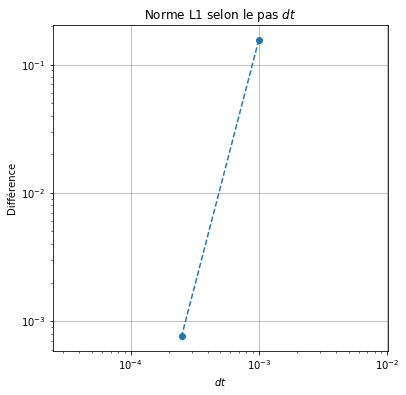

In [12]:
# taille de la figure
plt.figure(figsize=(6.0, 6.0))
# titre du graphique
plt.title('Norme L1 selon le pas $dt$')
# noms des axes
plt.xlabel('$dt$')
plt.ylabel('Différence')

plt.grid()
diff_values = [l1_diff(y_values[i], y_values[-1], dt_values[i]) for i in range(len(dt_values)-1)]
plt.loglog(dt_values[:-1], diff_values, color='C0', linestyle='--', marker='o')
plt.axis('equal');

On observe bien que plus $dt$ diminue, plus l'écart entre les résultats précédents diminue. Ceci n'est pas à proprement dit suffisant pour montrer la convergence de la méthode mais c'est en tout cas une condition nécessaire. On suppose pouvoir utiliser les mêmes méthodes que dans le MOOC.

# 5. Animations avec pyplot

Dans cette partie nous allons faire une **animation du double pendule** à partir des résulats obtenus ci-dessus.

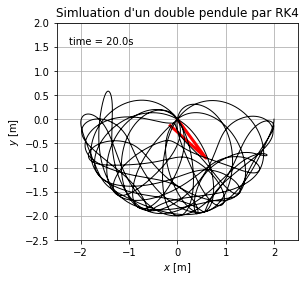

In [13]:
#facteur multiplicateur pour les frames
fact = 42

#crétation des figures (ref : MOOC)
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2.5, 2.5), ylim=(-2.5, 2))
ax.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('$x$ [m]')
plt.ylabel('$y$ [m]')

line, = ax.plot([], [], 'r-', lw=3)
extremity, = ax.plot([], [], 'black', lw=1)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

#fonctions d'initialisation et d'animations

def init(): #back-end
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i): #animation courante
    plt.title("Simluation d'un double pendule par RK4")
    thisx = [0, x1[i*fact], x2[i*fact]] #on ne prend qu'un facteur de frames afin d'alléger l'animation
    thisy = [0, y1[i*fact], y2[i*fact]]
    line.set_data(thisx, thisy)
    extremity.set_data(x2[:i*fact+1], y2[:i*fact+1]) #update la trace de l'extrémité du barreau
    time_text.set_text(time_template % (data[0][i*fact]))
    return extremity, line, time_text

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=int(len(data[1])/fact), interval=fact, blit=True)
#anim.save("double_pendulum.mp4", fps=fact*5/2) : décommenter si l'on veut sauver l'animation
HTML(anim.to_html5_video())

Cette dernière partie est un **bonus** donc le code sera moins explicité que dans les autres sections. Nous avons essayé de récréer une **animation similaire à celle de la page wikipedia** avec une trace évanescente. Pour cela nous avons du recourir à l'utilisation de colormaps.

**Note :** cette cellule peut mettre beacoup de temps à s'éxecuter.

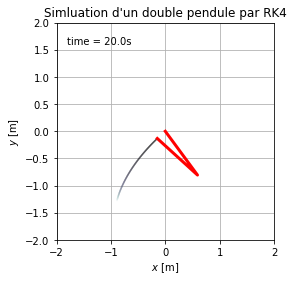

In [14]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

#facteur multiplicateur pour les frames
fact = 42 

#création de la figure
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()
Ax = [ax] #pseudo variable globale
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Simluation d'un double pendule par RK4")
plt.xlabel('$x$ [m]')
plt.ylabel('$y$ [m]')

line, = ax.plot([], [], 'r-', lw=3)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
dy2dx2 = np.diff(y2)/np.diff(x2) #création d'une norme selon la dérivée discrète

p_extremity = np.array([x2, y2]).T.reshape(-1, 1, 2)
segments = np.concatenate([p_extremity[:-1], p_extremity[1:]], axis=1)
# Create a continuous norm to map from data points to colors

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    fig.delaxes(Ax[0])
    Ax[0] = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
    Ax[0].grid()
    plt.gca().set_aspect('equal', adjustable='box')
    thisx = [0, x1[i*fact], x2[i*fact]]
    thisy = [0, y1[i*fact], y2[i*fact]]
    line, = Ax[0].plot(thisx, thisy, 'r-', lw=3)
    
    #fonction d'ajustement des données de la trace
    if i < 5:
        norm = plt.Normalize(dy2dx2.min(), dy2dx2.max())
        lc = LineCollection(segments[:i*fact], cmap='bone', norm=norm)
        lc.set_array(dy2dx2)
    else:
        temp_dy2dx2 = dy2dx2[(i-5)*fact:i*fact]
        norm = plt.Normalize(temp_dy2dx2.min(), temp_dy2dx2.max())
        lc = LineCollection(segments[(i-5)*fact:i*fact], cmap='bone', norm=norm)
        lc.set_array(temp_dy2dx2)
    lc.set_linewidth(1.5)
    
    #set_collection n'existe pas, on doit donc supprimer les axes avec relim() puis les recréer
    #d'où le fait d'utiliser une pseudo variable global Ax qui contient ax
    Ax[0].add_collection(lc) 
    plt.title("Simluation d'un double pendule par RK4")
    plt.xlabel('$x$ [m]')
    plt.ylabel('$y$ [m]')
    time_text = Ax[0].text(0.05, 0.9, time_template % (data[0][i*fact]), transform=Ax[0].transAxes)
    return line, time_text

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=int(len(data[1])/fact), interval=fact, blit=True)
#anim.save("double_pendulum.mp4", fps=fact*5/2) : décommenter si l'on veut sauver l'animation
HTML(anim.to_html5_video())

# 6. Références

* MOOC : [Practical Numerical Methods with Python](https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6286+2017/about)
* Page wikipedia du double pendule : https://en.wikipedia.org/wiki/Double_pendulum
* Page wikipedia des théorèmes de König : https://en.wikipedia.org/wiki/K%C3%B6nig%27s_theorem_(kinetics)
* Page wikipedia sur les équations d'Hamilton : https://en.wikipedia.org/wiki/Hamilton%E2%80%93Jacobi_equation
* Page wikipedia sur Rungee-Kutta : https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
* Page de documentation officielle de numpy : https://docs.scipy.org/doc/numpy/user/quickstart.html
* Page de documentation officielle de pyplot : https://matplotlib.org/api/pyplot_api.html
* Page de dcomentation officielle sur les animations avec matplotlib : https://matplotlib.org/api/animation_api.html
* Discussion sur la rapidité des fonctions mathématiques de math vs numpy : https://stackoverflow.com/questions/3650194/are-numpys-math-functions-faster-than-pythons
* Implémentation de LineCollection officielle de matplotlib : https://matplotlib.org/gallery/lines_bars_and_markers/multicolored_line.html